In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('train.csv',encoding='latin1')

In [3]:
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df.shape

(8693, 14)

In [5]:
unwanted_cols=['PassengerId','Name','Transported']
cols=[x for x in df.columns if x not in unwanted_cols]

In [6]:
X=df[cols]
Y=df['Transported']

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.3, random_state=42)

In [8]:
df.loc[X_train.index,'Sample']='DEV'
df.loc[X_test.index,'Sample']='VAL'

In [9]:
df['Sample'].value_counts()

DEV    6085
VAL    2608
Name: Sample, dtype: int64

In [10]:
df[cols].isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64

<AxesSubplot:xlabel='HomePlanet,Transported'>

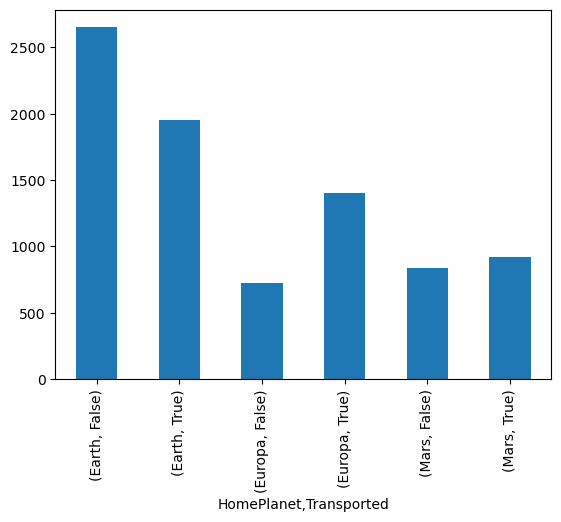

In [13]:
import matplotlib.pyplot as plt
df_planet=df.groupby(['HomePlanet','Transported']).size()
df_planet.plot(kind='bar')

<AxesSubplot:xlabel='Destination,Transported'>

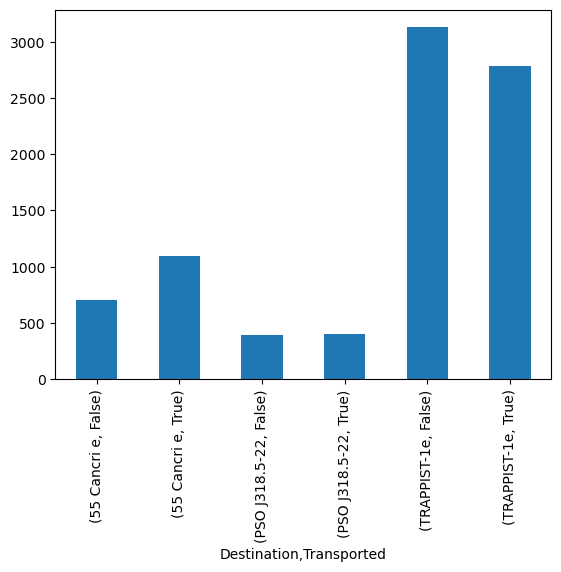

In [14]:
import matplotlib.pyplot as plt
df_dest=df.groupby(['Destination','Transported']).size()
df_dest.plot(kind='bar')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Sample        8693 non-null   object 
dtypes: bool(1), float64(6), object(8)
memory usage: 959.4+ KB


In [16]:
df['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [11]:
columns=['HomePlanet','Cabin','Destination']
for col in columns:
    df[col][df[col].isnull()]='Unknown'
    df[col]=df[col].astype('category')
    print(df[col].isnull().sum())

0
0
0


C:\Users\gk7\AppData\Local\Temp\7\ipykernel_29680\3219146368.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col].isnull()]='Unknown'
C:\Users\gk7\AppData\Local\Temp\7\ipykernel_29680\3219146368.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col].isnull()]='Unknown'
C:\Users\gk7\AppData\Local\Temp\7\ipykernel_29680\3219146368.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col].isnull()]='U

In [12]:
columns=['CryoSleep','VIP']
for col in columns:
    df[col]=np.select([df[col]==True,df[col]==False],[1,0],default=0)
    print(df[col].value_counts())

0    5656
1    3037
Name: CryoSleep, dtype: int64
0    8494
1     199
Name: VIP, dtype: int64


In [13]:
columns=['Age','Spa','RoomService','FoodCourt','ShoppingMall','VRDeck']

In [20]:
for col in columns:
    print(df[col].describe())

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64
count     8510.000000
mean       311.138778
std       1136.705535
min          0.000000
25%          0.000000
50%          0.000000
75%         59.000000
max      22408.000000
Name: Spa, dtype: float64
count     8512.000000
mean       224.687617
std        666.717663
min          0.000000
25%          0.000000
50%          0.000000
75%         47.000000
max      14327.000000
Name: RoomService, dtype: float64
count     8510.000000
mean       458.077203
std       1611.489240
min          0.000000
25%          0.000000
50%          0.000000
75%         76.000000
max      29813.000000
Name: FoodCourt, dtype: float64
count     8485.000000
mean       173.729169
std        604.696458
min          0.000000
25%          0.000000
50%          0.000000
75%         27.000000
max      23492.000000
Name: Shop

<AxesSubplot:ylabel='Frequency'>

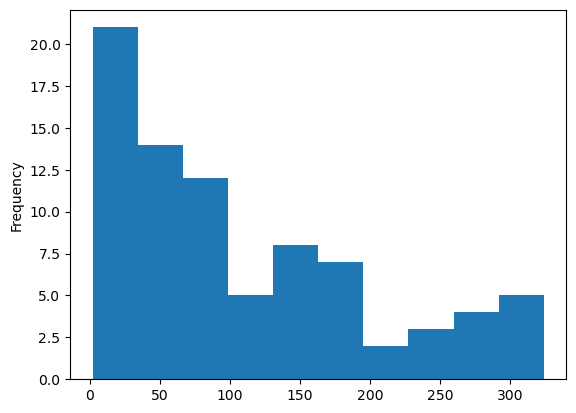

In [35]:
df['Age'].value_counts().plot(kind='hist')

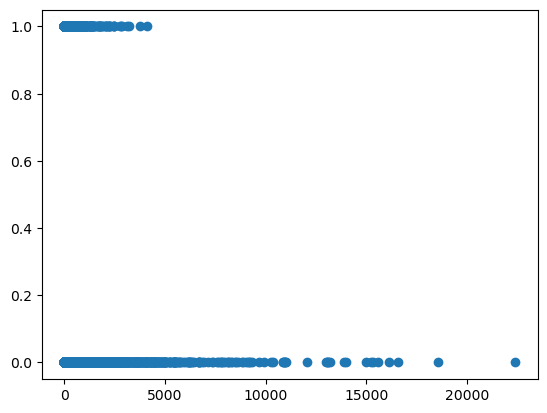

In [33]:
plt.scatter(x=df['Spa'],y=df['Transported'])
# df['Spa'].value_counts().plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

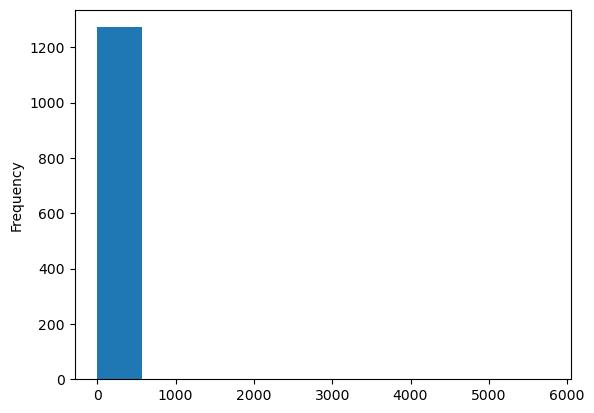

In [28]:
df['RoomService'].value_counts().plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

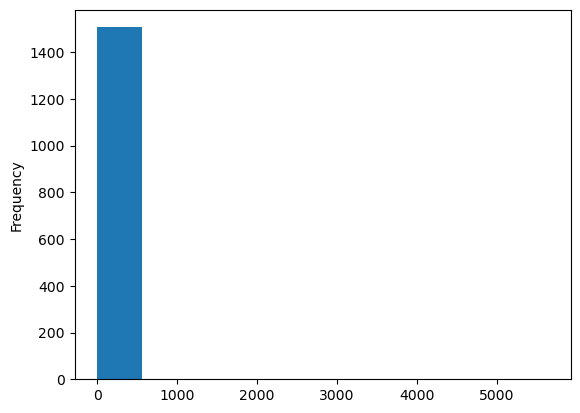

In [31]:
df['FoodCourt'].value_counts().plot(kind='hist')

In [ ]:
df['ShoppingMall'].value_counts().plot(kind='hist')

In [ ]:
df['VRDeck'].value_counts().plot(kind='hist')

In [14]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [15]:
columns=['Spa','RoomService','FoodCourt','ShoppingMall','VRDeck']
df.update(df[columns].fillna(0))

In [37]:
df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Sample            0
dtype: int64

In [42]:
df['Age_0to50']=((df['Age']>=0) & (df['Age']<=50)).astype(int)
df['Age_50to100']=((df['Age']>50) & (df['Age']<=100)).astype(int)
df['Age_100to150']=((df['Age']>100) & (df['Age']<=150)).astype(int)
df['Age_150to200']=((df['Age']>150) & (df['Age']<=200)).astype(int)
df['Age_200to250']=((df['Age']>200) & (df['Age']<=250)).astype(int)
df['Age_250to300']=((df['Age']>250) & (df['Age']<=300)).astype(int)
df['Age_300to350']=((df['Age']>300) & (df['Age']<=350)).astype(int)

In [55]:
X_train=df[df['Sample']=='DEV']
X_test=df[df['Sample']=='VAL']

In [424]:
x=['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
for i in x:
    df[i+'_S']=(df[i]-df[i].mean())/df[i].std()

In [616]:
cols=['CryoSleep','VRDeck_S','Spa_S','FoodCourt_S','HomePlanet','RoomService_S','Age']

In [64]:
df['Age_S']=(df['Age']-df['Age'].mean())/df['Age'].std()

In [56]:
X_train_c=X_train[cols]
Y_train=X_train['Transported']
X_test_c=X_test[cols]
Y_test=X_test['Transported']

In [17]:
def ks(y,pred):
    ksd=pd.DataFrame()
    ksd['target']=list(y) ### list of actual values
    ksd['prob']=list(pred)
    ksd['target0'] = 1 - ksd['target']
    np.random.seed(1)
    ksd['random'] = np.random.random(ksd.shape[0])
    ksd.sort_values(by=['prob','random'],ascending=False,inplace=True)
#print(ksd)
    ksd['bucket'] = pd.qcut(ksd['prob'].rank(method='first'), 10,labels=['1','2','3','4','5','6','7','8','9','10'])
    grouped = ksd.groupby(ksd['bucket'], as_index = False)
    kstable = pd.DataFrame()
    kstable['Total_Count'] = grouped.sum()['target'] + grouped.sum()['target0']
    kstable['min_prob'] = grouped.min()['prob']
    kstable['max_prob'] = grouped.max()['prob']
    kstable['mean_prob'] = grouped.mean()['prob']
    kstable['Target'] = grouped.sum()['target']
    kstable['Target_rate'] = (kstable.Target /( grouped.sum()['target'] + grouped.sum()['target0']) ).apply('{0:.3%}'.format)
    kstable['NonTarget'] = grouped.sum()['target0']
#kstable['nocashout_rate'] = (kstable.nocashout / ksd['target0'].sum()).apply('{0:.3%}'.format)
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['cum_Target']=(kstable.Target / ksd['target'].sum()).cumsum()
    kstable['cum_nonTarget']=(kstable.NonTarget / ksd['target0'].sum()).cumsum()
    kstable['cum_pct_Total'] = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    kstable['KS'] = np.abs(np.round(kstable['cum_Target']-kstable['cum_nonTarget'], 4) * 100)

#Formating
    kstable['cum_Target']= kstable['cum_Target'].apply('{0:.2%}'.format)
    kstable['cum_nonTarget']= kstable['cum_nonTarget'].apply('{0:.2%}'.format)
    kstable['cum_pct_Total']= kstable['cum_pct_Total'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable = kstable.astype({ 'Total_Count':int , 'Target' : int , 'NonTarget' : int})
    kstable.index.rename('Bin', inplace=True)
    del kstable['NonTarget']

    print( "KS is " + str(max(kstable['KS'])))
    return(kstable)

In [20]:
import lightgbm as lgbm

In [195]:
clf=lgbm.LGBMClassifier(importance_type='gain',random_state=50,max_depth=5,n_estimators=50,learning_rate=0.1,num_leaves=40,
                       max_bin=255)

In [196]:
clf.fit(X_train_c,Y_train)

LGBMClassifier(importance_type='gain', max_bin=255, max_depth=5,
               n_estimators=50, num_leaves=40, random_state=50)

In [197]:
y_pred=clf.predict_proba(X_train_c)[:,1]

In [198]:
ks(Y_train,y_pred)

KS is 64.47


,Total_Count,min_prob,max_prob,mean_prob,Target,Target_rate,cum_Target,cum_nonTarget,cum_pct_Total,KS
Bin,,,,,,,,,,
1,609,0.962685,0.991325,0.982894,607,99.672%,19.84%,0.07%,10.00%,19.78
2,608,0.895334,0.962093,0.943698,598,98.355%,39.39%,0.40%,20.00%,39.00
3,609,0.693612,0.895334,0.782719,527,86.535%,56.62%,3.11%,30.00%,53.51
4,608,0.626954,0.693612,0.659938,418,68.750%,70.28%,9.39%,40.00%,60.90
5,608,0.548626,0.626954,0.592530,360,59.211%,82.05%,17.58%,50.00%,64.47
6,609,0.388803,0.548595,0.486583,255,41.872%,90.39%,29.28%,60.00%,61.11
7,608,0.182001,0.388251,0.257055,161,26.480%,95.65%,44.05%,70.00%,51.60
8,609,0.139793,0.181866,0.156773,99,16.256%,98.89%,60.91%,80.00%,37.98
9,608,0.091155,0.139436,0.121053,33,5.428%,99.97%,79.91%,90.00%,20.06


In [199]:
y_pred_test=clf.predict_proba(X_test_c)[:,1]

In [200]:
ks(Y_test,y_pred_test)

KS is 58.37


,Total_Count,min_prob,max_prob,mean_prob,Target,Target_rate,cum_Target,cum_nonTarget,cum_pct_Total,KS
Bin,,,,,,,,,,
1,261,0.967433,0.990638,0.983785,259,99.234%,19.64%,0.16%,10.00%,19.48
2,261,0.900335,0.967036,0.946089,255,97.701%,38.97%,0.62%,20.00%,38.35
3,261,0.718823,0.898702,0.800109,198,75.862%,53.98%,5.51%,30.00%,48.47
4,260,0.633609,0.718192,0.671000,170,65.385%,66.87%,12.49%,40.00%,54.38
5,261,0.563208,0.633609,0.601061,158,60.536%,78.85%,20.48%,50.00%,58.37
6,261,0.439169,0.563208,0.507777,126,48.276%,88.40%,30.95%,60.00%,57.45
7,260,0.197198,0.437912,0.300074,64,24.615%,93.25%,46.16%,70.00%,47.09
8,261,0.143500,0.197184,0.164481,42,16.092%,96.44%,63.15%,80.00%,33.29
9,261,0.098882,0.143465,0.124288,34,13.027%,99.01%,80.76%,90.00%,18.25


In [201]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_train,clf.predict(X_train_c) ))

0.8211996713229253


In [202]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,clf.predict(X_test_c) ))

0.8009969325153374


In [203]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, clf.predict(X_train_c)))

              precision    recall  f1-score   support

       False       0.85      0.78      0.81      3026
        True       0.80      0.86      0.83      3059

    accuracy                           0.82      6085
   macro avg       0.82      0.82      0.82      6085
weighted avg       0.82      0.82      0.82      6085



In [204]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, clf.predict(X_test_c)))

              precision    recall  f1-score   support

       False       0.83      0.74      0.79      1289
        True       0.77      0.86      0.81      1319

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



In [205]:
features=pd.DataFrame({'Feature':cols,'Importance':clf.feature_importances_}).sort_values(by="Importance",ascending=False).reset_index(drop=True)

In [206]:
features

,Feature,Importance
0,CryoSleep,7254.218489
1,Spa,2305.706349
2,VRDeck,2211.874613
3,FoodCourt,1900.380532
4,RoomService,1602.955525
5,HomePlanet,1220.808073
6,Cabin_G,797.003410
7,Age,733.545428
8,ShoppingMall,615.200012
9,Cabin_E,599.168421


In [207]:
df_test=pd.read_csv('test.csv',encoding='latin1')

In [208]:
df_test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [209]:
columns=['HomePlanet','Cabin','Destination']
for col in columns:
    df_test[col][df_test[col].isnull()]='Unknown'
    df_test[col]=df_test[col].astype('category')

C:\Users\gk7\AppData\Local\Temp\7\ipykernel_29680\333688269.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[col][df_test[col].isnull()]='Unknown'
C:\Users\gk7\AppData\Local\Temp\7\ipykernel_29680\333688269.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[col][df_test[col].isnull()]='Unknown'
C:\Users\gk7\AppData\Local\Temp\7\ipykernel_29680\333688269.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[col

In [210]:
columns=['CryoSleep','VIP']
for col in columns:
    df_test[col]=np.select([df_test[col]==True,df_test[col]==False],[1,0],default=0)

In [211]:
columns=['Spa','RoomService','FoodCourt','ShoppingMall','VRDeck']
df_test.update(df_test[columns].fillna(0))

In [38]:
df_test.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age             91
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
dtype: int64

In [212]:
df_test['Cabin_A']=np.where(df_test['Cabin'].str.contains('A'),1,0)
df_test['Cabin_B']=np.where(df_test['Cabin'].str.contains('B'),1,0)
df_test['Cabin_C']=np.where(df_test['Cabin'].str.contains('C'),1,0)
df_test['Cabin_D']=np.where(df_test['Cabin'].str.contains('D'),1,0)
df_test['Cabin_E']=np.where(df_test['Cabin'].str.contains('E'),1,0)
df_test['Cabin_F']=np.where(df_test['Cabin'].str.contains('F'),1,0)
df_test['Cabin_G']=np.where(df_test['Cabin'].str.contains('G'),1,0)

In [213]:
df_test['Transported']=clf.predict(df_test[cols])

In [214]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Transported
0,0013_01,Earth,1,G/3/S,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,...,0.0,Nelly Carsoning,0,0,0,0,0,0,1,True
1,0018_01,Earth,0,F/4/S,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,...,0.0,Lerome Peckers,0,0,0,0,0,1,0,False
2,0019_01,Europa,1,C/0/S,55 Cancri e,31.0,0,0.0,0.0,0.0,...,0.0,Sabih Unhearfus,0,0,1,0,0,0,0,True
3,0021_01,Europa,0,C/1/S,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,...,585.0,Meratz Caltilter,0,0,1,0,0,0,0,True
4,0023_01,Earth,0,F/5/S,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,...,0.0,Brence Harperez,0,0,0,0,0,1,0,True


In [215]:
df_test['Transported'].value_counts()

True     2385
False    1892
Name: Transported, dtype: int64

In [216]:
df_submit=df_test[['PassengerId','Transported']]
df_submit.to_csv('Submission.csv',index=False)

In [16]:
df_dummy=pd.get_dummies(df,prefix=['HomePlanet','Destination'],columns=['HomePlanet','Destination'])

In [17]:
df_dummy.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Transported,Sample,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_Unknown,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_Unknown
0,0001_01,0,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,...,False,VAL,0,1,0,0,0,0,1,0
1,0002_01,0,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,...,True,DEV,1,0,0,0,0,0,1,0
2,0003_01,0,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,...,False,DEV,0,1,0,0,0,0,1,0
3,0003_02,0,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,...,False,DEV,0,1,0,0,0,0,1,0
4,0004_01,0,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,...,True,DEV,1,0,0,0,0,0,1,0


In [45]:
unwanted_cols=['PassengerId','Name','Transported','Sample','Cabin']
cols=[x for x in df.columns if x not in unwanted_cols]

In [46]:
cols

['HomePlanet',
 'CryoSleep',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Cabin_A',
 'Cabin_B',
 'Cabin_C',
 'Cabin_D',
 'Cabin_E',
 'Cabin_F',
 'Cabin_G']

In [225]:
##Encoding Cabin
df['Cabin'].value_counts().sort_values(ascending=False)

Unknown     199
G/734/S       8
C/137/S       7
B/201/P       7
E/13/S        7
           ... 
G/80/S        1
G/800/P       1
G/802/S       1
G/803/P       1
F/1763/S      1
Name: Cabin, Length: 6561, dtype: int64

In [20]:
df_dummy['Cabin_A']=np.where(df['Cabin'].str.contains('A'),1,0)
df_dummy['Cabin_B']=np.where(df['Cabin'].str.contains('B'),1,0)
df_dummy['Cabin_C']=np.where(df['Cabin'].str.contains('C'),1,0)
df_dummy['Cabin_D']=np.where(df['Cabin'].str.contains('D'),1,0)
df_dummy['Cabin_E']=np.where(df['Cabin'].str.contains('E'),1,0)
df_dummy['Cabin_F']=np.where(df['Cabin'].str.contains('F'),1,0)
df_dummy['Cabin_G']=np.where(df['Cabin'].str.contains('G'),1,0)

In [43]:
df['Cabin_A']=np.where(df['Cabin'].str.contains('A'),1,0)
df['Cabin_B']=np.where(df['Cabin'].str.contains('B'),1,0)
df['Cabin_C']=np.where(df['Cabin'].str.contains('C'),1,0)
df['Cabin_D']=np.where(df['Cabin'].str.contains('D'),1,0)
df['Cabin_E']=np.where(df['Cabin'].str.contains('E'),1,0)
df['Cabin_F']=np.where(df['Cabin'].str.contains('F'),1,0)
df['Cabin_G']=np.where(df['Cabin'].str.contains('G'),1,0)

In [428]:
cols=['CryoSleep','VRDeck_S','Spa_S','FoodCourt_S','HomePlanet','RoomService_S','ShoppingMall_S','Age_S','Cabin_A','Cabin_B'
,'Cabin_C','Cabin_D','Cabin_E','Cabin_F','Cabin_G','Destination']

In [127]:
unwanted_cols=['PassengerId','Name','Transported','Sample','Cabin']
cols=[x for x in df.columns if x not in unwanted_cols]

In [429]:
cols

['CryoSleep',
 'VRDeck_S',
 'Spa_S',
 'FoodCourt_S',
 'HomePlanet',
 'RoomService_S',
 'ShoppingMall_S',
 'Age_S',
 'Cabin_A',
 'Cabin_B',
 'Cabin_C',
 'Cabin_D',
 'Cabin_E',
 'Cabin_F',
 'Cabin_G',
 'Destination']

In [27]:
X_train=df_dummy[df_dummy['Sample']=='DEV']
X_test=df_dummy[df_dummy['Sample']=='VAL']

In [26]:
X_train=df[df['Sample']=='DEV']
X_test=df[df['Sample']=='VAL']

In [28]:
X_train_c=X_train[cols]
Y_train=X_train['Transported']
X_test_c=X_test[cols]
Y_test=X_test['Transported']

In [265]:
from sklearn.ensemble import AdaBoostClassifier
clf=AdaBoostClassifier(random_state=50,n_estimators=110,learning_rate=0.5)

In [172]:
clf=lgbm.LGBMClassifier(importance_type='gain',random_state=50,max_depth=5,n_estimators=50)

In [173]:
clf.fit(X_train_c,Y_train)

LGBMClassifier(importance_type='gain', max_depth=4, n_estimators=50,
               random_state=50)

In [174]:
y_pred=clf.predict_proba(X_train_c)[:,1]

In [175]:
ks(y_pred,Y_train)

KS is 44.65


,Total_Count,min_prob,max_prob,mean_prob,Target,Target_rate,cum_Target,cum_nonTarget,cum_pct_Total,KS
Bin,,,,,,,,,,
1,608,True,True,1.000000,445,73.233%,14.56%,5.38%,10.00%,9.18
2,608,True,True,1.000000,437,72.016%,28.87%,11.00%,20.00%,17.87
3,609,True,True,1.000000,441,72.566%,43.31%,16.52%,30.00%,26.79
4,608,True,True,1.000000,440,72.449%,57.71%,22.06%,40.00%,35.66
5,609,True,True,1.000000,442,72.738%,72.19%,27.55%,50.00%,44.65
6,609,False,False,0.000000,175,28.806%,77.93%,41.87%,60.00%,36.05
7,608,False,False,0.000000,159,26.174%,83.13%,56.71%,70.00%,26.42
8,609,False,False,0.000000,174,28.676%,88.84%,71.06%,80.00%,17.78
9,608,False,False,0.000000,170,28.111%,94.43%,85.51%,90.00%,8.92


In [176]:
print(classification_report(Y_train,clf.predict(X_train_c)))

              precision    recall  f1-score   support

       False       0.85      0.76      0.80      3026
        True       0.78      0.87      0.83      3059

    accuracy                           0.81      6085
   macro avg       0.82      0.81      0.81      6085
weighted avg       0.82      0.81      0.81      6085



In [177]:
print(classification_report(Y_test,clf.predict(X_test_c)))

              precision    recall  f1-score   support

       False       0.84      0.72      0.77      1289
        True       0.76      0.87      0.81      1319

    accuracy                           0.79      2608
   macro avg       0.80      0.79      0.79      2608
weighted avg       0.80      0.79      0.79      2608



In [178]:
print(accuracy_score(Y_test,clf.predict(X_test_c)))

0.7921779141104295


In [74]:
df_test=pd.read_csv('test.csv',encoding='latin1')

In [81]:
df_dummy_test=pd.get_dummies(df_test,prefix=['HomePlanet','Destination'],columns=['HomePlanet','Destination'])

In [82]:
df_dummy_test['Cabin_A']=np.where(df_test['Cabin'].str.contains('A'),1,0)
df_dummy_test['Cabin_B']=np.where(df_test['Cabin'].str.contains('B'),1,0)
df_dummy_test['Cabin_C']=np.where(df_test['Cabin'].str.contains('C'),1,0)
df_dummy_test['Cabin_D']=np.where(df_test['Cabin'].str.contains('D'),1,0)
df_dummy_test['Cabin_E']=np.where(df_test['Cabin'].str.contains('E'),1,0)
df_dummy_test['Cabin_F']=np.where(df_test['Cabin'].str.contains('F'),1,0)
df_dummy_test['Cabin_G']=np.where(df_test['Cabin'].str.contains('G'),1,0)

In [117]:
df_dummy_test['Transported']=clf.predict(df_dummy_test[cols])

In [118]:
df_dummy_test['Transported'].value_counts()

True     2363
False    1914
Name: Transported, dtype: int64

In [86]:
df_submit=df_dummy_test[['PassengerId','Transported']]
df_submit.to_csv('Submission.csv',index=False)

In [147]:
df_test['Cabin_A']=np.where(df_test['Cabin'].str.contains('A'),1,0)
df_test['Cabin_B']=np.where(df_test['Cabin'].str.contains('B'),1,0)
df_test['Cabin_C']=np.where(df_test['Cabin'].str.contains('C'),1,0)
df_test['Cabin_D']=np.where(df_test['Cabin'].str.contains('D'),1,0)
df_test['Cabin_E']=np.where(df_test['Cabin'].str.contains('E'),1,0)
df_test['Cabin_F']=np.where(df_test['Cabin'].str.contains('F'),1,0)
df_test['Cabin_G']=np.where(df_test['Cabin'].str.contains('G'),1,0)

In [149]:
df_test['Transported']=clf.predict(df_test[cols])

In [150]:
df_test['Transported'].value_counts()

True     2385
False    1892
Name: Transported, dtype: int64

In [179]:
df_submit=df_test[['PassengerId','Transported']]
df_submit.to_csv('Submission.csv',index=False)

In [29]:
from sklearn.neural_network import MLPClassifier

In [210]:
clf = MLPClassifier(solver='adam', alpha=0.05,hidden_layer_sizes=(10,), random_state=1,activation='relu',
                    learning_rate='adaptive')

In [211]:
clf.fit(X_train_c,Y_train)

MLPClassifier(alpha=0.05, hidden_layer_sizes=(10,), learning_rate='adaptive',
              random_state=1)

In [212]:
y_pred=clf.predict_proba(X_train_c)[:,1]

In [213]:
ks(y_pred,Y_train)

KS is 49.980000000000004


,Total_Count,min_prob,max_prob,mean_prob,Target,Target_rate,cum_Target,cum_nonTarget,cum_pct_Total,KS
Bin,,,,,,,,,,
1,608,True,True,1.000000,450,74.043%,15.10%,5.08%,10.00%,10.02
2,608,True,True,1.000000,448,73.747%,30.14%,10.23%,20.00%,19.91
3,609,True,True,1.000000,449,73.735%,45.20%,15.38%,30.00%,29.82
4,608,True,True,1.000000,450,74.031%,60.30%,20.47%,40.00%,39.83
5,609,True,True,1.000000,452,74.331%,75.48%,25.51%,50.00%,49.98
6,609,False,False,0.000000,155,25.530%,80.70%,40.12%,60.00%,40.58
7,608,False,False,0.000000,133,21.926%,85.17%,55.41%,70.00%,29.76
8,609,False,False,0.000000,150,24.660%,90.21%,70.19%,80.00%,20.01
9,608,False,False,0.000000,146,24.068%,95.12%,85.07%,90.00%,10.05


In [214]:
from sklearn.metrics import classification_report
print(classification_report(Y_train,clf.predict(X_train_c)))

              precision    recall  f1-score   support

       False       0.83      0.76      0.79      3026
        True       0.78      0.85      0.81      3059

    accuracy                           0.80      6085
   macro avg       0.81      0.80      0.80      6085
weighted avg       0.81      0.80      0.80      6085



In [221]:
print(classification_report(Y_test,clf.predict(X_test_c)))

              precision    recall  f1-score   support

       False       0.78      0.79      0.78      1289
        True       0.79      0.78      0.78      1319

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608



In [216]:
print(accuracy_score(Y_test,clf.predict(X_test_c)))

0.7887269938650306


In [217]:
from sklearn.ensemble import RandomForestClassifier

In [416]:
clf=RandomForestClassifier(criterion='gini',max_depth=10,n_estimators=220,max_leaf_nodes=200,random_state=1,
                           min_samples_leaf=10,min_samples_split=15,max_features='log2')

In [417]:
clf.fit(X_train_c,Y_train)

RandomForestClassifier(max_depth=10, max_features='log2', max_leaf_nodes=200,
                       min_samples_leaf=10, min_samples_split=15,
                       n_estimators=220, random_state=1)

In [418]:
from sklearn.metrics import classification_report
print(classification_report(Y_train,clf.predict(X_train_c)))

              precision    recall  f1-score   support

       False       0.83      0.81      0.82      3026
        True       0.82      0.83      0.82      3059

    accuracy                           0.82      6085
   macro avg       0.82      0.82      0.82      6085
weighted avg       0.82      0.82      0.82      6085



In [419]:
print(classification_report(Y_test,clf.predict(X_test_c)))

              precision    recall  f1-score   support

       False       0.81      0.77      0.79      1289
        True       0.79      0.82      0.80      1319

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



In [420]:
print(accuracy_score(Y_test,clf.predict(X_test_c)))

0.7967791411042945


In [422]:
df['FoodCourt'].describe()

count     8693.000000
mean       448.434027
std       1595.790627
min          0.000000
25%          0.000000
50%          0.000000
75%         61.000000
max      29813.000000
Name: FoodCourt, dtype: float64